Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач по исследованию нескольких аспектов мобильного приложения:

В первую очередь, его интересует показатель retention. Напишите функцию для его подсчета.
Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите, какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.
Предложите метрики для оценки результатов последнего прошедшего тематического события в игре. 

Задание 1

Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).

In [1]:
import pandas as pd # импортируем библиотеки
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import shapiro

problem1-reg_data.csv – данные о времени регистрации

problem1-auth_data.csv – данные о времени захода пользователей в игру

In [2]:
df_reg = pd.read_csv('problem1-reg_data.csv', sep=';') #загрузим данные

In [3]:
df_auth = pd.read_csv('problem1-auth_data.csv', sep=';')

Посмотрим на датасеты.

In [4]:
df_reg.head() # выводим первые строки датасетов

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [5]:
df_auth.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [6]:
df_reg.shape # выведем рамеры датасетов

(1000000, 2)

In [7]:
df_auth.shape

(9601013, 2)

Выведем количество пропусков в датасетах.

In [8]:
df_reg.isnull().sum()

reg_ts    0
uid       0
dtype: int64

In [9]:
df_auth.isnull().sum()

auth_ts    0
uid        0
dtype: int64

В данных нет пропусков

Выведем основные статистики данных датасетов

In [10]:
df_reg.describe()

,reg_ts,uid
count,1.000000e+06,1.000000e+06
mean,1.548332e+09,5.552354e+05
std,5.253653e+07,3.206011e+05
min,9.113822e+08,1.000000e+00
25%,1.528034e+09,2.776438e+05
50%,1.564454e+09,5.550455e+05
75%,1.585759e+09,8.329712e+05
max,1.600874e+09,1.110622e+06


In [11]:
df_auth.describe()

,auth_ts,uid
count,9.601013e+06,9.601013e+06
mean,1.548778e+09,3.347198e+05
std,5.160527e+07,2.832669e+05
min,9.113822e+08,1.000000e+00
25%,1.528375e+09,9.599700e+04
50%,1.564577e+09,2.579210e+05
75%,1.585823e+09,5.190250e+05
max,1.600874e+09,1.110622e+06


In [12]:
df_reg['reg_ts'] = pd.to_datetime(df_reg['reg_ts'], unit='s')
df_reg['reg_ts']

0        1998-11-18 09:43:43
1        1999-07-22 22:38:09
2        2000-01-13 22:27:27
3        2000-05-28 14:19:01
4        2000-09-16 11:21:53
                 ...        
999995   2020-09-23 15:13:54
999996   2020-09-23 15:14:46
999997   2020-09-23 15:15:39
999998   2020-09-23 15:16:31
999999   2020-09-23 15:17:24
Name: reg_ts, Length: 1000000, dtype: datetime64[ns]

In [13]:
df_reg['reg_ts'] = df_reg['reg_ts'].dt.date
df_reg['reg_ts'].head()

0    1998-11-18
1    1999-07-22
2    2000-01-13
3    2000-05-28
4    2000-09-16
Name: reg_ts, dtype: object

In [14]:
df_auth['auth_ts'] = pd.to_datetime(df_auth['auth_ts'], unit='s')
df_auth['auth_ts']

0         1998-11-18 09:43:43
1         1999-07-22 22:38:09
2         1999-07-25 16:46:46
3         1999-07-31 03:50:15
4         1999-08-05 17:49:39
                  ...        
9601008   2020-09-23 15:13:54
9601009   2020-09-23 15:14:46
9601010   2020-09-23 15:15:39
9601011   2020-09-23 15:16:31
9601012   2020-09-23 15:17:24
Name: auth_ts, Length: 9601013, dtype: datetime64[ns]

In [15]:
df_auth['auth_ts'] = df_auth['auth_ts'].dt.date
df_auth['auth_ts']

0          1998-11-18
1          1999-07-22
2          1999-07-25
3          1999-07-31
4          1999-08-05
              ...    
9601008    2020-09-23
9601009    2020-09-23
9601010    2020-09-23
9601011    2020-09-23
9601012    2020-09-23
Name: auth_ts, Length: 9601013, dtype: object

In [16]:
df_reg.nunique

<bound method DataFrame.nunique of             reg_ts      uid
0       1998-11-18        1
1       1999-07-22        2
2       2000-01-13        3
3       2000-05-28        4
4       2000-09-16        5
...            ...      ...
999995  2020-09-23  1110618
999996  2020-09-23  1110619
999997  2020-09-23  1110620
999998  2020-09-23  1110621
999999  2020-09-23  1110622

[1000000 rows x 2 columns]>

In [17]:
df_auth.nunique

<bound method DataFrame.nunique of             auth_ts      uid
0        1998-11-18        1
1        1999-07-22        2
2        1999-07-25        2
3        1999-07-31        2
4        1999-08-05        2
...             ...      ...
9601008  2020-09-23  1110618
9601009  2020-09-23  1110619
9601010  2020-09-23  1110620
9601011  2020-09-23  1110621
9601012  2020-09-23  1110622

[9601013 rows x 2 columns]>

In [18]:
df = df_reg.merge(df_auth, on = 'uid', how='left') #объединим данные в один датасет
df.head()

,reg_ts,uid,auth_ts
0,1998-11-18,1,1998-11-18
1,1999-07-22,2,1999-07-22
2,1999-07-22,2,1999-07-25
3,1999-07-22,2,1999-07-31
4,1999-07-22,2,1999-08-05


In [19]:
df.shape

(9601013, 3)

Напишем функцию для подсчета Retention игроков

In [20]:
min_date = df['reg_ts'].min() #оставим последний 1% дат для дальнейшего отображения хитмапа
max_date = df['reg_ts'].max()
cutoff_date = max_date - 0.01 * (max_date - min_date)
latest_period = df[df['reg_ts'] > cutoff_date]
latest_period 

,reg_ts,uid,auth_ts
9323636,2020-07-07,975883,2020-07-07
9323637,2020-07-07,975883,2020-07-13
9323638,2020-07-07,975883,2020-07-19
9323639,2020-07-07,975883,2020-07-22
9323640,2020-07-07,975883,2020-07-24
...,...,...,...
9601008,2020-09-23,1110618,2020-09-23
9601009,2020-09-23,1110619,2020-09-23
9601010,2020-09-23,1110620,2020-09-23
9601011,2020-09-23,1110621,2020-09-23


In [21]:
def calculate_retention(df, max_days=30):
    
    # рассчитываем разницу в днях между авторизацией и регистрацией
    df['days_after_reg'] = (df['auth_ts'] - df['reg_ts']).dt.days
    df = df[df['days_after_reg'].between(0, max_days-1)]
    
    # размеры когорт (уникальные пользователи по дням регистрации)
    cohort_sizes = df.groupby('reg_ts')['uid'].nunique()
    
    # считаем retention
    retention = (df.groupby(['reg_ts', 'days_after_reg'])['uid']
                 .nunique()
                 .unstack()
                 .div(cohort_sizes, axis=0))
    
    # визуализация дневного ретеншна
    plt.figure(figsize=(25, 20))
    sns.heatmap(retention * 100,  # умножаем на 100 для процентов
                annot=True,
                fmt='.1f',
                cmap='YlGnBu',
                linewidths=0.5,
                cbar_kws={'label': 'Retention (%)'},
                annot_kws={"size": 8})
    
    plt.title('Дневной Retention по когортам', fontsize=14)
    plt.xlabel('Дни после регистрации', fontsize=12)
    plt.ylabel('Дата регистрации', fontsize=12)
    plt.show()
    
    # средний retention по дням
    mean_retention = retention.mean().to_frame('Средний retention (%)')
    mean_retention = mean_retention.T
    
    plt.figure(figsize=(15, 1))
    sns.heatmap(mean_retention * 100,
                annot=True,
                fmt='.1f',
                cmap='YlGnBu',
                cbar=False,
                annot_kws={"size": 12})
    plt.title('Средний дневной Retention', fontsize=14)
    plt.xlabel('Дни после регистрации', fontsize=12)
    plt.yticks([])
    plt.show()
    
      # считаем недельный retention
    df['weeks_after_reg'] = df['days_after_reg'] // 7
    weekly_ret = df.groupby([df['reg_ts'], 'weeks_after_reg'])['uid'].nunique().unstack().fillna(0)
    weekly_retention = weekly_ret.divide(cohort_sizes, axis=0)  

    plt.figure(figsize=(22, 14))  
    sns.heatmap(weekly_retention * 100, 
               annot=True, 
               fmt='.1f', 
               cmap='coolwarm', 
               linewidths=0.5, 
               linecolor='white', 
               annot_kws={"size": 8})
    plt.title('Недельный ретеншн по когортам', fontsize=14)
    plt.xlabel('Количество недель с регистрации', fontsize=12)
    plt.ylabel('Дата регистрации', fontsize=12)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()
    return retention, mean_retention, weekly_retention

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


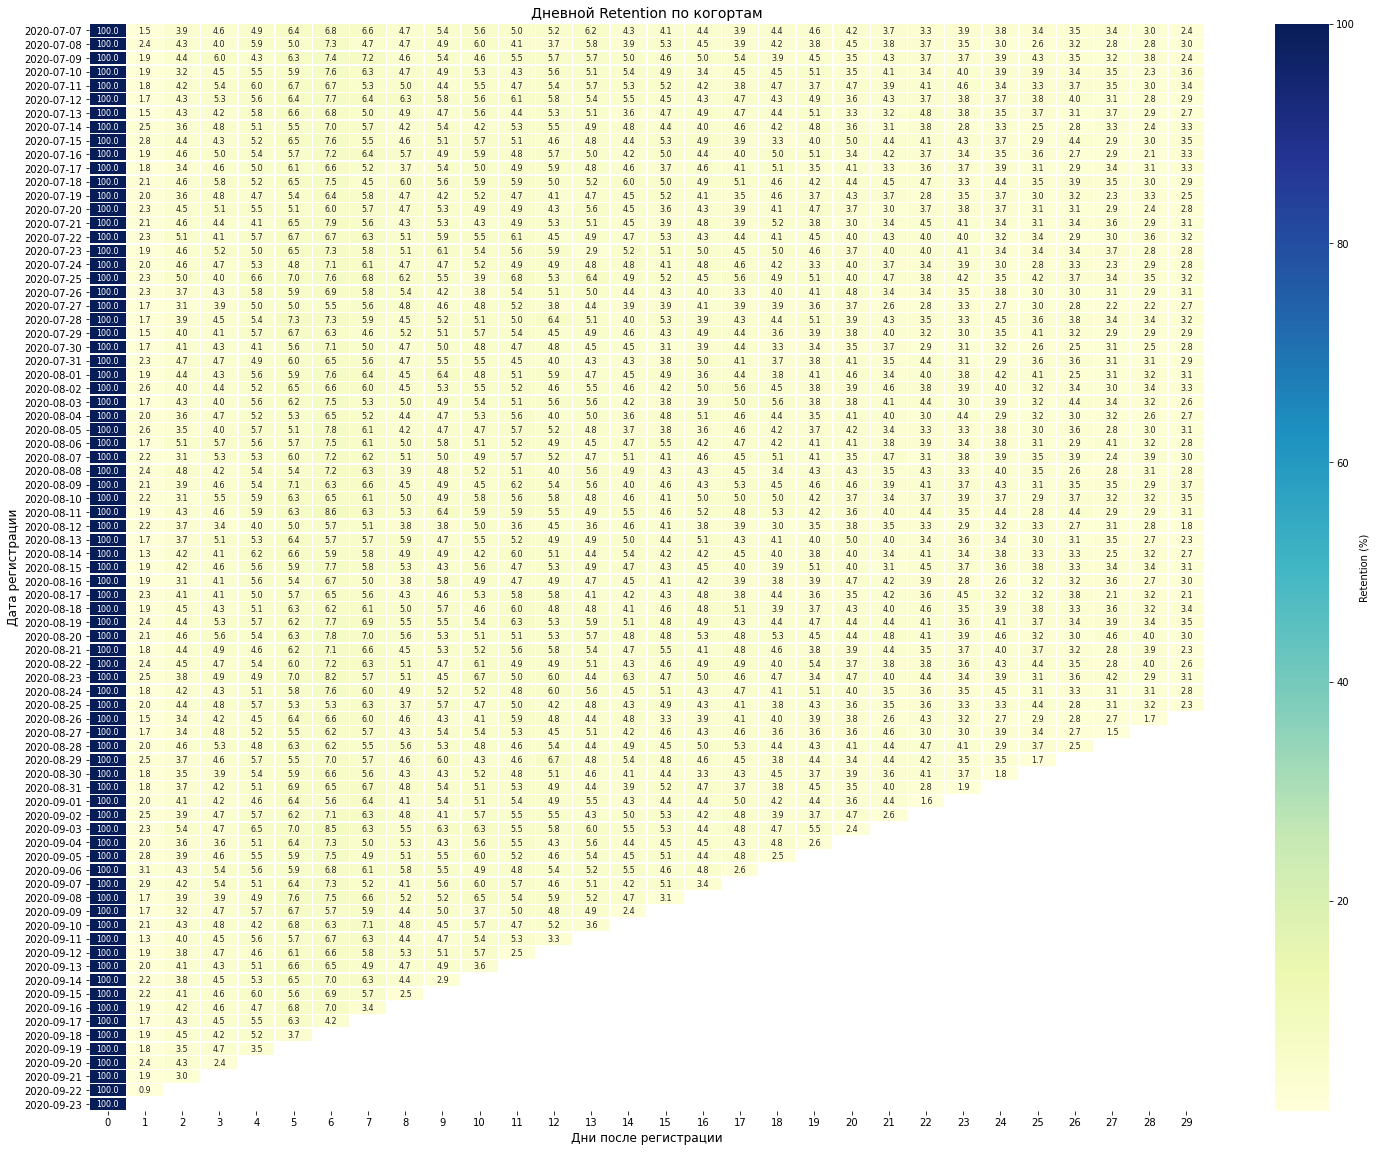

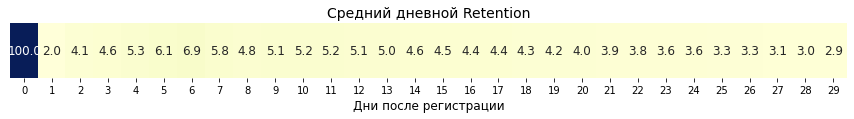

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


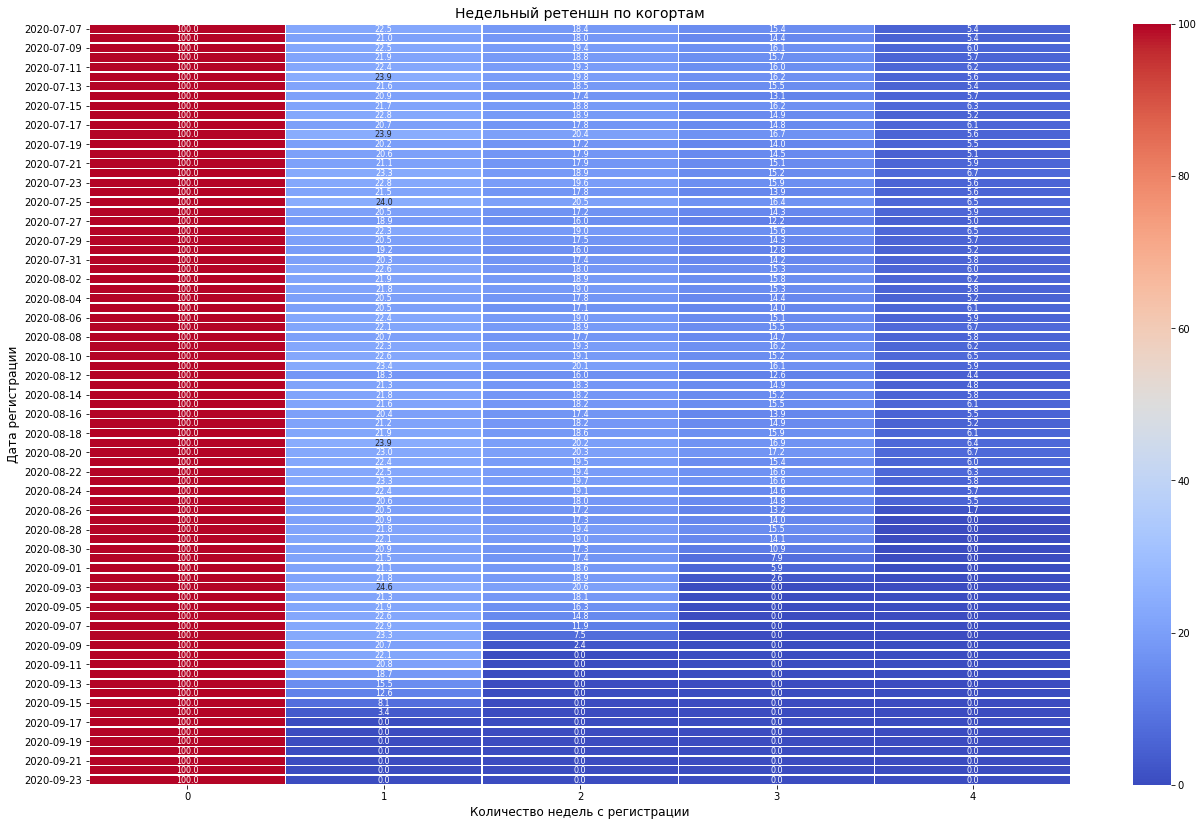

In [22]:
retention, mean_retention, weekly_retention = calculate_retention(latest_period )

In [23]:
display(retention.head()) 
display(weekly_retention.head())
display(mean_retention.head())

days_after_reg,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
reg_ts,,,,,,,,,,,,,,,,,,,,,
2020-07-07,1.0,0.015214,0.038728,0.045643,0.049101,0.063624,0.068465,0.065698,0.047026,0.053942,...,0.042185,0.037344,0.033195,0.039419,0.038036,0.033887,0.035270,0.033887,0.030429,0.023513
2020-07-08,1.0,0.024155,0.043478,0.040028,0.059351,0.049689,0.073154,0.046929,0.046929,0.048999,...,0.044859,0.037957,0.037267,0.034507,0.030366,0.025535,0.032436,0.028295,0.028295,0.030366
2020-07-09,1.0,0.019310,0.044138,0.060000,0.043448,0.063448,0.074483,0.071724,0.045517,0.054483,...,0.035172,0.043448,0.036552,0.036552,0.039310,0.042759,0.035172,0.031724,0.037931,0.024138
2020-07-10,1.0,0.018569,0.031637,0.045392,0.055021,0.059147,0.075653,0.062586,0.047455,0.048831,...,0.035076,0.041265,0.034388,0.039890,0.039202,0.039202,0.034388,0.035076,0.023384,0.035763
2020-07-11,1.0,0.017869,0.041924,0.053608,0.059794,0.067354,0.066667,0.052921,0.050172,0.043986,...,0.046735,0.039175,0.040550,0.046048,0.033677,0.032990,0.037113,0.035052,0.029553,0.033677


weeks_after_reg,0,1,2,3,4
reg_ts,,,,,
2020-07-07,1.0,0.224758,0.183956,0.154219,0.053942
2020-07-08,1.0,0.210490,0.180124,0.144237,0.053830
2020-07-09,1.0,0.224828,0.193793,0.160690,0.060000
2020-07-10,1.0,0.218707,0.187758,0.157497,0.057084
2020-07-11,1.0,0.224055,0.193127,0.160137,0.061856


days_after_reg,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Средний retention (%),1.0,0.020277,0.040721,0.045837,0.052722,0.060944,0.068905,0.058471,0.047946,0.050934,...,0.039701,0.038571,0.037612,0.03581,0.036063,0.033338,0.03299,0.031344,0.030325,0.029183


Наибольший ретенн игроков отмечается в первый день регистрации (100%), что вполне объяснимо, так как сразу после регистрации обычно пользователи входят в игру. Однако, на следующий день ситуация меняется и retention падает до 2%, что указывает на значительный отток, что говорит о необходимости сосредоточиться на улучшении онбординга и первого пользовательского опыта (скорее всего возникают какие-то проблемы). Уже на второй неделе показатель ретеншн варьируется от 4,6% до 5,2%. Наибольший показатель ретеншн, за исключением 1 дня, наблюдается на 6 день (6,9%), 5 день (6,1) что может быть связано с проведением каких-то тематических событий или предоставением скидки, например. После 11 дня показатель колеблется в среднем от 3 до 5%. Стоит обратить внимание на качество игры и уровни игры, которые игроки проходят в дни с малым ретеншн для выявления причин. Так, наблюдается сильный отток после первого дня, значит, нужно обратить внимание на совершенствование первого опыта пользователя. Необходимо выявить с чем связано повышение возврата в определенные дни, посмотреть какие события происходят в это время и в дальнейшем, возможно распространить на постоянной основе. 

Задание 2

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [24]:
df_task_2 = pd.read_csv('Проект_1_Задание_2.csv', sep =';')

In [25]:
df_task_2.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [26]:
df_task_2.describe()

,user_id,revenue
count,404770.000000,404770.000000
mean,202385.500000,26.083435
std,116847.178567,681.652928
min,1.000000,0.000000
25%,101193.250000,0.000000
50%,202385.500000,0.000000
75%,303577.750000,0.000000
max,404770.000000,37433.000000


In [27]:
df_task_2.isnull().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

Пропусков в данном датасете нет.

Для выявления какое из акционных предложений лучше рассмотрим такие метрики монетизации и поведения игроков, как: CR, который отражает долю платящих пользователей. Это ключевой показатель, позволяющий понять, насколько само предложение мотивирует пользователей совершать первую покупку; ARPU — средний доход на одного пользователя. Он показывает, сколько в среднем приносит один игрок, даже если он не платит. Рост ARPU может свидетельствовать о повышении эффективности предложения для всей аудитории, но важно понимать, за счёт чего он достигается — роста конверсии или увеличения суммы трат у небольшой группы игроков; ARPPU — показывает, сколько в среднем платит каждый пользователь, совершивший покупку. Рост ARPPU говорит о том, что платящие игроки стали приносить больше дохода, что может быть связано с более выгодными или дорогими предложениями. Также, следует анализировать распределение прибыли с помощью кривой Лоренца, чтобы определить степень неравномерности выручки. Высокая концентрация дохода у 1–5% пользователей может говорить о рисках: при уходе этих игроков проект потеряет значительную часть выручки; медиану прибыли, что также позволяет увидеть распределение прибыли. Если медиана равна нулю, это означает, что большинство пользователей не совершают покупок вовсе, и выводы, основанные только на средних значениях, могут быть искажены из-за игроков с большими оплатами;Необходимо провести статистические тесты, чтобы убедиться, что это  действительно устойчивый эффект. 

In [28]:
control = df_task_2[df_task_2['testgroup'] == 'a']
test = df_task_2[df_task_2['testgroup'] == 'b']

In [29]:
def metrics(group): # функция для подсчета метрик 
    get_revenue = group[group['revenue'] > 0]
    return {'gamers': len(group), 'buyers': len(get_revenue), 'CR': len(get_revenue) / len(group),'ARPU': group['revenue'].mean(), 'ARPPU': get_revenue['revenue'].mean() if len(get_revenue) > 0 else 0,'median_revenue': group['revenue'].median(), 'total_revenue': group['revenue'].sum()}

In [30]:
metrics_control = metrics(control) # посчитаем метрики для контрольной группы
metrics_control

{'gamers': 202103,
 'buyers': 1928,
 'CR': 0.009539690157988749,
 'ARPU': 25.413719736965806,
 'ARPPU': 2663.9984439834025,
 'median_revenue': 0.0,
 'total_revenue': 5136189}

In [31]:
metrics_test = metrics(test) # посчитаем метрики для тестовой группы игроков
metrics_test

{'gamers': 202667,
 'buyers': 1805,
 'CR': 0.008906235351586593,
 'ARPU': 26.75128659327863,
 'ARPPU': 3003.6581717451522,
 'median_revenue': 0.0,
 'total_revenue': 5421603}

Конверсия в тестовой группе ниже, чем в контрольной, платящих игроков также в тестовой группе меньше, однако показатели ARPU, ARPPU и общая выручка выше в тестовой группе, что говорит о том, что большая часть выручки в тесте обеспечена меньшим числом платящих игроков, но с большими чеками.  

In [32]:
def finantial(df_task_2): # функция для подсчета финансового распределения в зависимости от прибыли от игроков
    get_money = df_task_2[df_task_2['revenue'] > 0].copy()
    get_money['revenue_segment'] = pd.cut(get_money['revenue'], bins=[0, 100, 500, 1000, np.inf], labels=['<100', '100-500', '500-1000', '>1000'])
    finantion = get_money.groupby(['testgroup', 'revenue_segment']).agg(gamers=('user_id', 'count'), total_revenue=('revenue', 'sum')).reset_index()
    return finantion

finance_distribution= finantial(df_task_2)
print(f"Распределение оплаты:\n{finance_distribution}")

Распределение оплаты:
  testgroup revenue_segment  gamers  total_revenue
0         a            <100       0            NaN
1         a         100-500    1805       545937.0
2         a        500-1000       0            NaN
3         a           >1000     123      4590252.0
4         b            <100       0            NaN
5         b         100-500       0            NaN
6         b        500-1000       0            NaN
7         b           >1000    1805      5421603.0


Text(0, 0.5, 'Количество игроков')

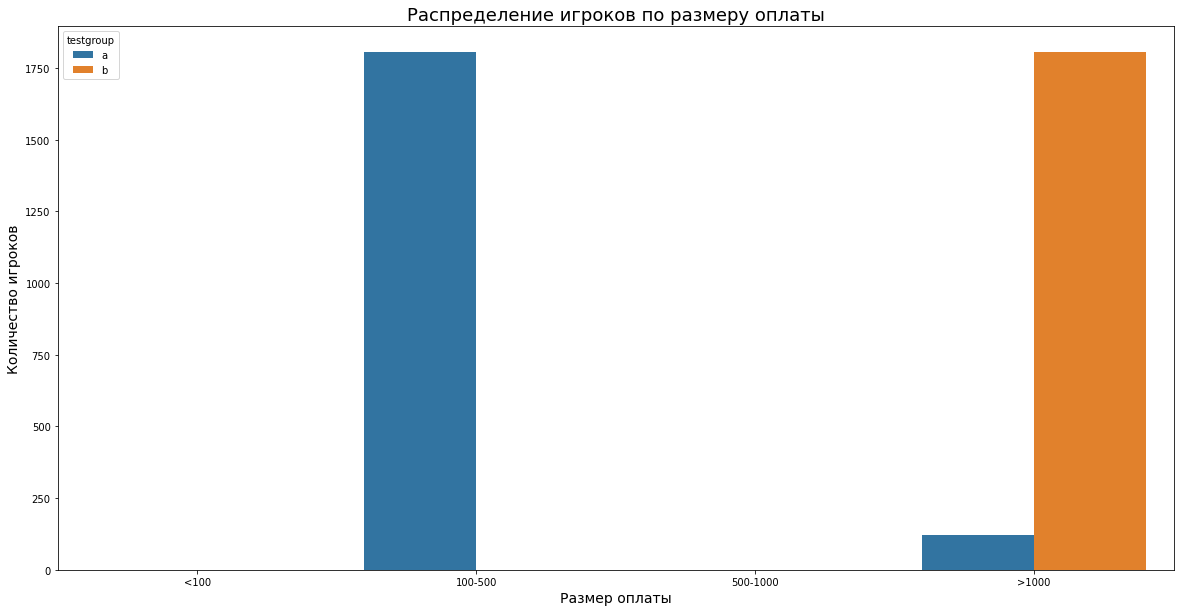

In [33]:
plt.figure(figsize=(20, 10)) # гистограмма распределения платежей по группам 
sns.barplot(data=finance_distribution, x='revenue_segment', y='gamers', hue='testgroup')
plt.title('Распределение игроков по размеру оплаты',fontsize = 18)
plt.xlabel('Размер оплаты', fontsize = 14)
plt.ylabel('Количество игроков', fontsize = 14)

В контрольной группе вся выручка приходится на игроков с покупками >1000 ₽. Другие сегменты не представлены. Тестовое предложение расширило сегмент платящих – появились игроки с чеком 100–500 ₽. Контрольная группа эффективнее в привлечении крупных трат.

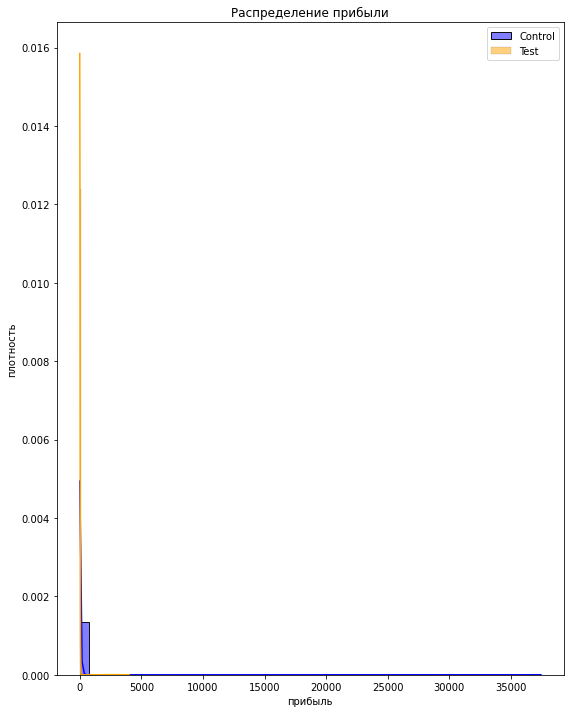

In [34]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1) # график распределения дохода
sns.histplot(control['revenue'], label='Control', kde=True, stat='density', bins=50, color='blue')
sns.histplot(test['revenue'], label='Test', kde=True, stat='density', bins=50, color='orange')
plt.title('Распределение прибыли')
plt.xlabel('прибыль')
plt.ylabel('плотность')
plt.legend()

В распределении прибыли от игроков видно, что большинство из них грают бесплатно, а почти весь доход приносит небольшая доля игроков, это видно на графике - пик и концентрация в нуле и очень длинный хвост вправо, это что отражает неравномерное распределние выручки и смещение распределния выручки. В разрезе групп видно, что в контрольной группе больше игроков с высокой оплатой, а в тестовой группе больше игроков, но онии с маленькой оплатой. Рассчет показателей по среднему может быть не самым надежным в связи со смещением, поэтому стоит рассмотреть еще непараметрические тесты  и медианные значения.

Text(0, 0.5, 'прибыль')

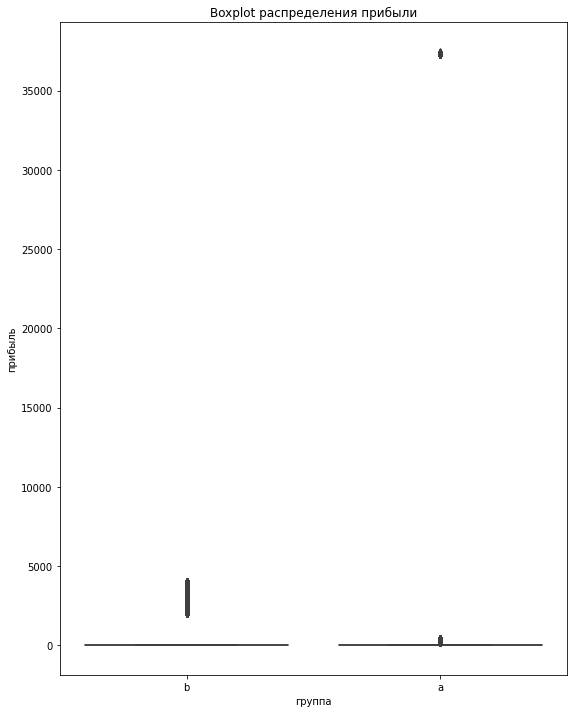

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 2) # построим boxplot для распределения прибыли
sns.boxplot(x='testgroup', y='revenue', data=df_task_2)
plt.title('Boxplot распределения прибыли')
plt.xlabel('группа')
plt.ylabel('прибыль')

На данном боксплоте видно, что прибыль варьируется в основном от 0 до 5000. Также, в контрольной группе виден выброс в размере прибыли выше 35000. При сравнениии групп контрольной и тестовой видно, что тестовая группа приносит больше доходов, чем контрольная.

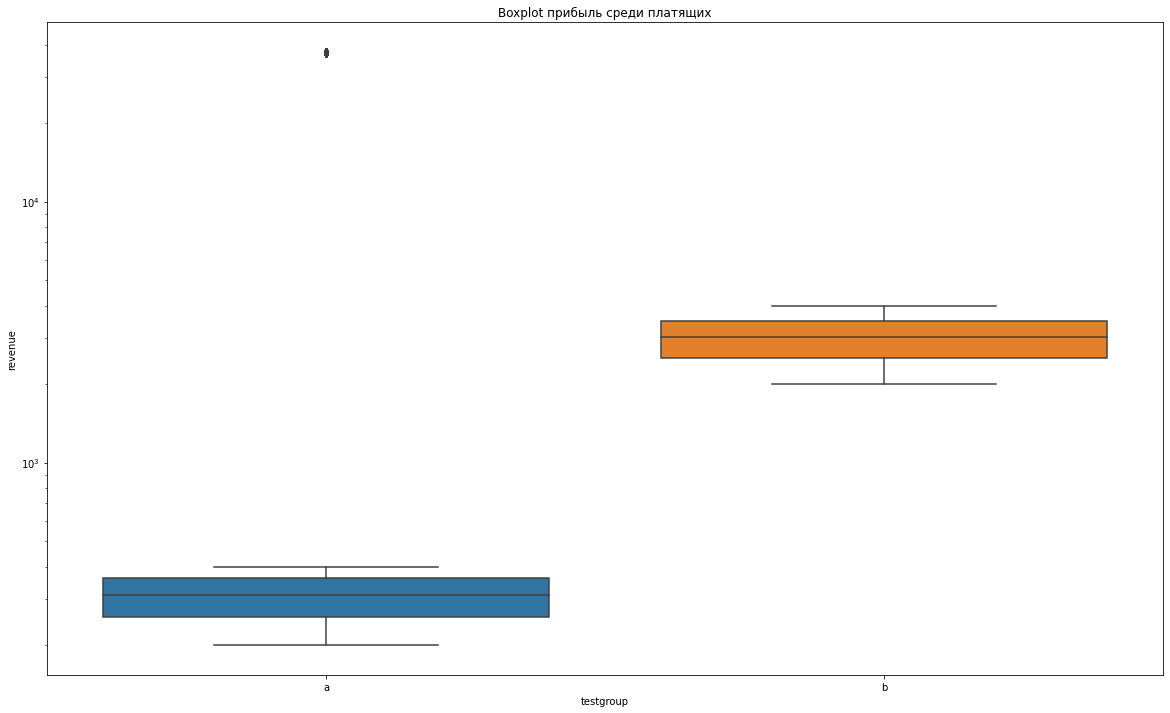

In [36]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df_task_2[df_task_2['revenue'] > 0], x='testgroup', y='revenue') # построим боксплоты в логарифмированной шкале с выучкой среди заплативших игроков
plt.title("Boxplot прибыль среди платящих")
plt.yscale('log')

По данному боксплоту видно, что игроки из тестовой группы приносят гораздо больше прибыли, в тестовой группе отсутствуют выбросы, а в контрольной они есть.

In [37]:
plt.figure(figsize=(20, 12))
paying_users = df_task_2[df_task_2['revenue'] > 0] # отильтруем платящих пользователей
Q1 = paying_users['revenue'].quantile(0.25) # границы выбросов по IQR
Q3 = paying_users['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# определим выбросы
outliers = paying_users[(paying_users['revenue'] < lower_bound) | 
                      (paying_users['revenue'] > upper_bound)]
outliers_ratio = len(outliers) / len(paying_users)

<Figure size 1440x864 with 0 Axes>

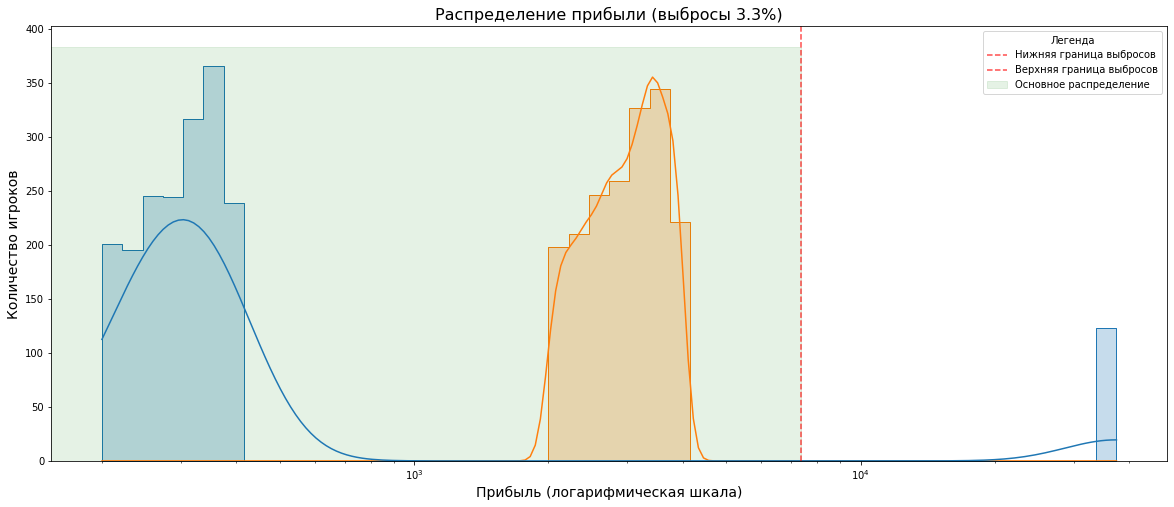

In [38]:
plt.figure(figsize=(20, 8))# гистограмма с выделением выбросов
hist = sns.histplot(data=paying_users, x='revenue', hue='testgroup',
                   bins=50, kde=True, element='step', log_scale=True)
hist.axvline(lower_bound, color='r', linestyle='--', alpha=0.7, label='Нижняя граница выбросов')
hist.axvline(upper_bound, color='r', linestyle='--', alpha=0.7, label='Верхняя граница выбросов')
hist.fill_betweenx([0, plt.ylim()[1]], lower_bound, upper_bound, color='green', alpha=0.1, label='Основное распределение')

plt.title(f"Распределение прибыли (выбросы {outliers_ratio:.1%})", fontsize=16)
plt.xlabel("Прибыль (логарифмическая шкала)", fontsize=14)
plt.ylabel("Количество игроков", fontsize=14)
plt.legend(title='Легенда')
plt.show()

In [39]:
print(f"\nАнализ выбросов (IQR метод):")
print(f"Всего платящих пользователей: {len(paying_users)}")
print(f"Выбросов: {len(outliers)} ({outliers_ratio:.1%})")
print(f"Границы выбросов: [{lower_bound:.2f}, {upper_bound:.2f}]\n")
print("Статистика по выбросам:")
print(outliers.groupby('testgroup')['revenue'].describe())
print("\nСтатистика по основным данным:")
print(paying_users[~paying_users.index.isin(outliers.index)]
      .groupby('testgroup')['revenue'].describe())


Анализ выбросов (IQR метод):
Всего платящих пользователей: 3733
Выбросов: 123 (3.3%)
Границы выбросов: [-3916.50, 7351.50]

Статистика по выбросам:
           count          mean        std      min      25%      50%      75%  \
testgroup                                                                       
a          123.0  37319.121951  25.442183  37293.0  37301.0  37311.0  37329.0   

               max  
testgroup           
a          37433.0  

Статистика по основным данным:
            count         mean         std     min     25%     50%     75%  \
testgroup                                                                    
a          1805.0   302.458172   57.914246   200.0   254.0   305.0   352.0   
b          1805.0  3003.658172  572.619709  2000.0  2513.0  3022.0  3478.0   

              max  
testgroup          
a           400.0  
b          4000.0  


В анализе платежей высокие чеки — нормальное явление и удаление таких значений может исказить показатели ARPPU и общую выручку, может привести к неправильной оценке потенциального дохода, измерению бизнес-метрик и как результат принятию неправильных бизнес-решений.

In [40]:
metrics_df = df_task_2.groupby('testgroup').apply(metrics).apply(pd.Series) # применяем функцию metrics к данным для удобства визуализации метрик

In [41]:
metrics_df.head()

,gamers,buyers,CR,ARPU,ARPPU,median_revenue,total_revenue
testgroup,,,,,,,
a,202103.0,1928.0,0.009540,25.413720,2663.998444,0.0,5136189.0
b,202667.0,1805.0,0.008906,26.751287,3003.658172,0.0,5421603.0


Text(0.5, 0, 'группа')

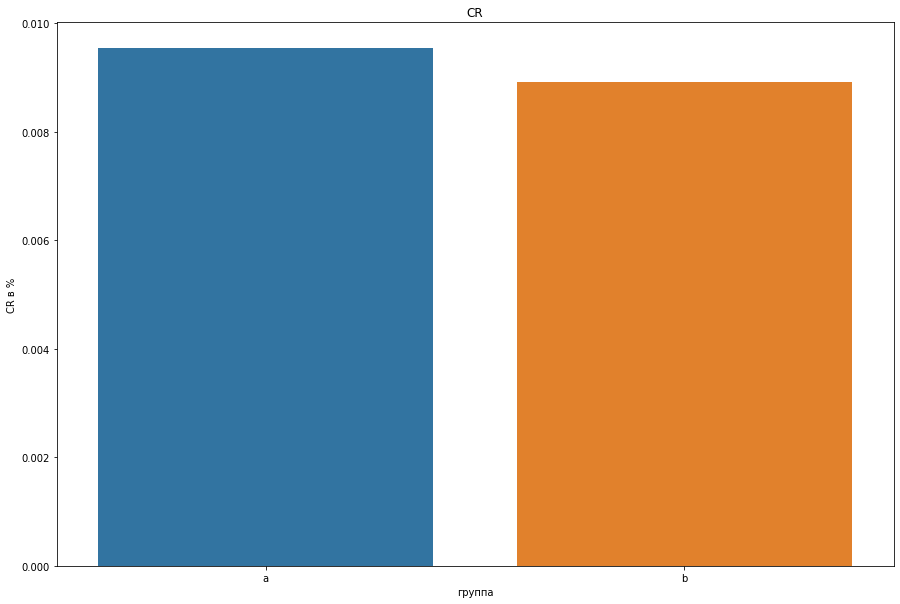

In [42]:
plt.figure(figsize=(15, 10))# CR
sns.barplot(x=metrics_df.index, y='CR', data=metrics_df)
plt.title('CR') 
plt.ylabel('CR в %')
plt.xlabel('группа')

За весь период показатель retention rate у контрольной группы выше, чем у тестовой. Игроки из контрольно группы чаще возвращаются в игру.

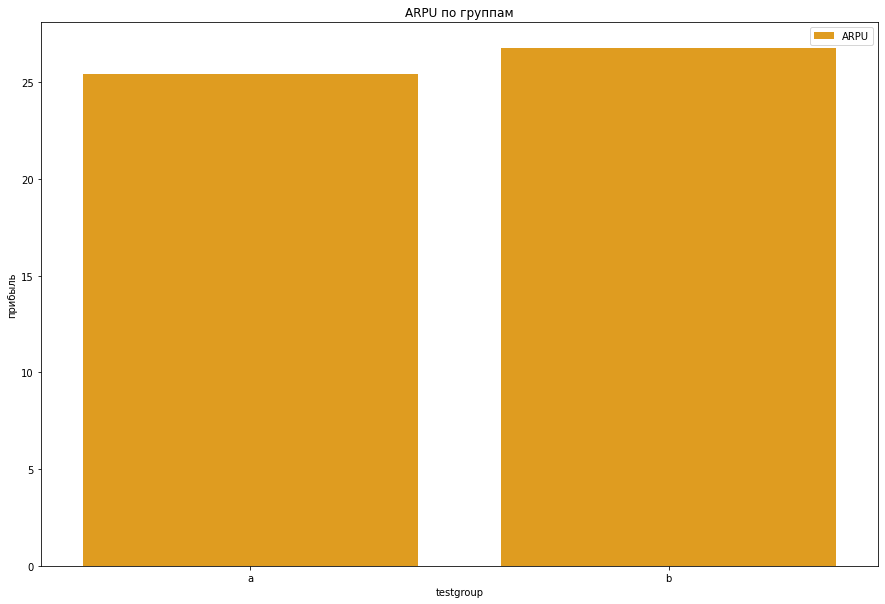

In [43]:
plt.figure(figsize=(15, 10))
sns.barplot(x=metrics_df.index, y='ARPU', data=metrics_df, label='ARPU', color = 'orange')
plt.title('ARPU по группам')
plt.ylabel('прибыль')
plt.legend()

Тестовая руппа имеет больший показатель ARPU и показывает лучшую монетизацию. Акционный набор для тестовой группы более эффективен. 

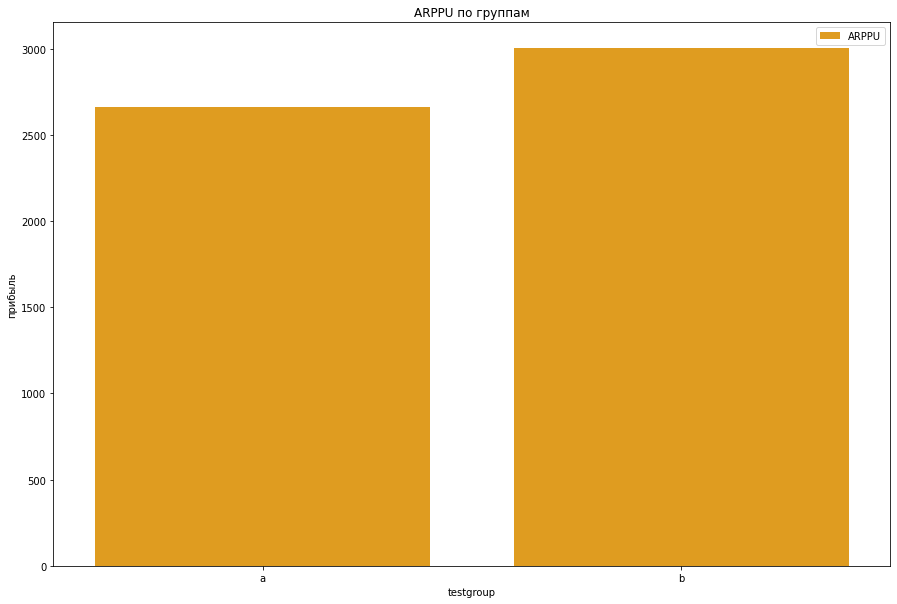

In [44]:
plt.figure(figsize=(15, 10))
sns.barplot(x=metrics_df.index, y='ARPPU', data=metrics_df, label='ARPPU', color = 'orange')
plt.title('ARPPU по группам')
plt.ylabel('прибыль')
plt.legend()

График показывает значительный разброс значений между группами. В тестовой группе средний доход с платящего пользователя значительно выше, что говорит о том, что платящие игроки при новом предложении приносят больше денег, возможно, из-за наличия более привлекательных или дорогих товаров. 

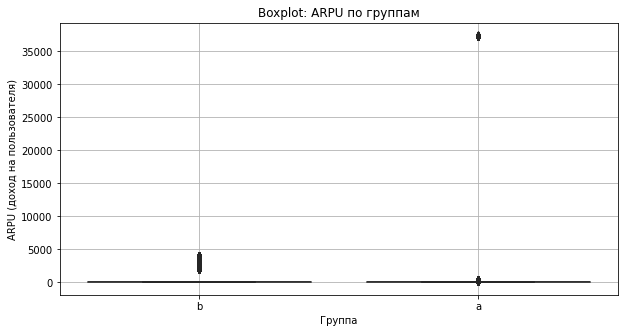

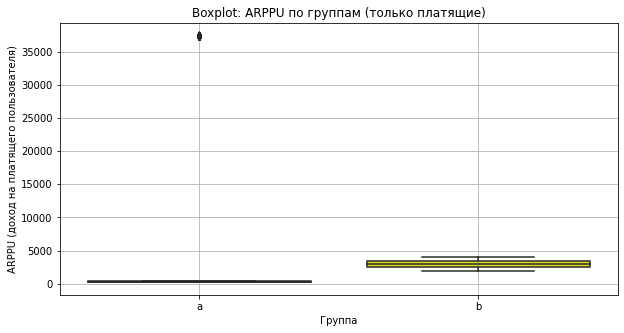

In [45]:
arpu_df = df_task_2.groupby(['user_id', 'testgroup'], as_index=False)['revenue'].sum()
arpu_df.columns = ['user_id', 'testgroup', 'ARPU']
arpu_df['is_payer'] = arpu_df['ARPU'] > 0 # метка платящего пользователя
arppu_df = arpu_df[arpu_df['is_payer']].copy()# ARPPU — только для платящих
arppu_df.rename(columns={'ARPU': 'ARPPU'}, inplace=True)

# Boxplot для ARPU
plt.figure(figsize=(10, 5))
sns.boxplot(data=arpu_df, x='testgroup', y='ARPU', palette=['green', 'yellow'])
plt.title('Boxplot: ARPU по группам')
plt.xlabel('Группа')
plt.ylabel('ARPU (доход на пользователя)')
plt.grid(True)

# Boxplot для ARPPU
plt.figure(figsize=(10, 5))
sns.boxplot(data=arppu_df, x='testgroup', y='ARPPU', palette=['green', 'yellow'])
plt.title('Boxplot: ARPPU по группам (только платящие)')
plt.xlabel('Группа')
plt.ylabel('ARPPU (доход на платящего пользователя)')
plt.grid(True)

In [46]:
paying_users = df_task_2[df_task_2['revenue'] > 0].copy()
paying_users['revenue_winsorized'] = mstats.winsorize(
    paying_users['revenue'], 
    limits=[0.05, 0.05]  # ограничиваем по 5% с каждой стороны
)


metrics = []
for group in ['a', 'b']:
    group_data = paying_users[paying_users['testgroup'] == group] # ARPU и ARPPU для каждой группы после винзоризации
    
    # ARPU
    arpu = df_task_2[df_task_2['testgroup'] == group]['revenue'].mean()
    
    # ARPPU
    arppu_winsorized = group_data['revenue_winsorized'].mean()
    
    metrics.append({'testgroup': group,'ARPU': arpu,'ARPPU_winsorized': arppu_winsorized})

metrics_df = pd.DataFrame(metrics).set_index('testgroup')
metrics_df

,ARPU,ARPPU_winsorized
testgroup,,
a,25.413720,534.925311
b,26.751287,3002.389474


In [47]:
# ARPU и ARPPU для теста Шапиро-Уилка
results = []
for group in ['a', 'b']:
    
    group_data = df_task_2[df_task_2['testgroup'] == group] # выборка по группе
    paying_group = paying_users[paying_users['testgroup'] == group]
    arpu_sample = group_data['revenue']# ARPU 
    arppu_sample = paying_group['revenue_winsorized']# ARPPU 
    sh_arpu = shapiro(arpu_sample)# тест Шапиро-Уилка для ARPU
    sh_arppu = shapiro(arppu_sample)# тест Шапиро-Уилка для ARPPU
    
    results.append({
        'group': group,
        'ARPU_stat': sh_arpu[0],
        'ARPU_pvalue': sh_arpu[1],
        'ARPPU_stat': sh_arppu[0],
        'ARPPU_pvalue': sh_arppu[1],
        'n_arpu': len(arpu_sample),
        'n_arppu': len(arppu_sample)
    })

results_df = pd.DataFrame(results).set_index('group')
print("Результаты теста Шапиро-Уилка:")
print(results_df)

Результаты теста Шапиро-Уилка:
       ARPU_stat  ARPU_pvalue  ARPPU_stat  ARPPU_pvalue  n_arpu  n_arppu
group                                                                   
a       0.008877          0.0    0.314848  0.000000e+00  202103     1928
b       0.065882          0.0    0.955001  3.699431e-23  202667     1805


/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
alpha = 0.05
print("\nИнтерпретация результатов:")
for group in ['a', 'b']:
    print(f"\nГруппа {group.upper()}:")
    
    arpu_p = results_df.loc[group, 'ARPU_pvalue']
    arpu_norm = "нормальное" if arpu_p > alpha else "НЕ нормальное"
    print(f"ARPU: p-value = {arpu_p:.4f} ({arpu_norm} распределение)")
    
    arppu_p = results_df.loc[group, 'ARPPU_pvalue']
    arppu_norm = "нормальное" if arppu_p > alpha else "НЕ нормальное"
    print(f"ARPPU: p-value = {arppu_p:.4f} ({arppu_norm} распределение)")


Интерпретация результатов:

Группа A:
ARPU: p-value = 0.0000 (НЕ нормальное распределение)
ARPPU: p-value = 0.0000 (НЕ нормальное распределение)

Группа B:
ARPU: p-value = 0.0000 (НЕ нормальное распределение)
ARPPU: p-value = 0.0000 (НЕ нормальное распределение)


Нарисуем кривую Лоренца. Она позволяет оценить неравномерность распределения прибыли между группами контрольной и тестовой. Чем ближе кривая Лоренца к кривой равенства,тем больше метрика распределена равномерно и почти все пользователи приносят одинаковый вклад. 

In [49]:
def lorenz(df_task_2, group_name="gamers"):
    sorted_revenue = np.sort(df_task_2['revenue'].values) # отсортируем прибыль
    all_revenue = np.cumsum(sorted_revenue).astype(float) 
    all_revenue = all_revenue/all_revenue[-1] if all_revenue[-1] != 0 else 1
    x = np.linspace(0.0, 1.0, len(all_revenue))
    plt.figure(figsize=(20, 10)) # построим график кривой Лоренца
    plt.plot(x, all_revenue, label='Кривая Лоренца', color='orange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='green', label='Кривая равенства') # кривая равенства - идеальная ситуация, когда каждый человек получает одинаковый доход
    plt.title(f'Кривая Лоренца')
    plt.xlabel('Доля игроков')
    plt.ylabel('Доля прибыли')
    plt.legend()
    plt.grid(True)

In [50]:
import statsmodels.api as sm 

def qq(df_task_2, group="gamers"):
    plt.figure(figsize=(20, 12))
    sm.qqplot(df_task_2['revenue'], line='s')
    plt.title(f'Q-Q график ({group})')
    plt.grid(True)

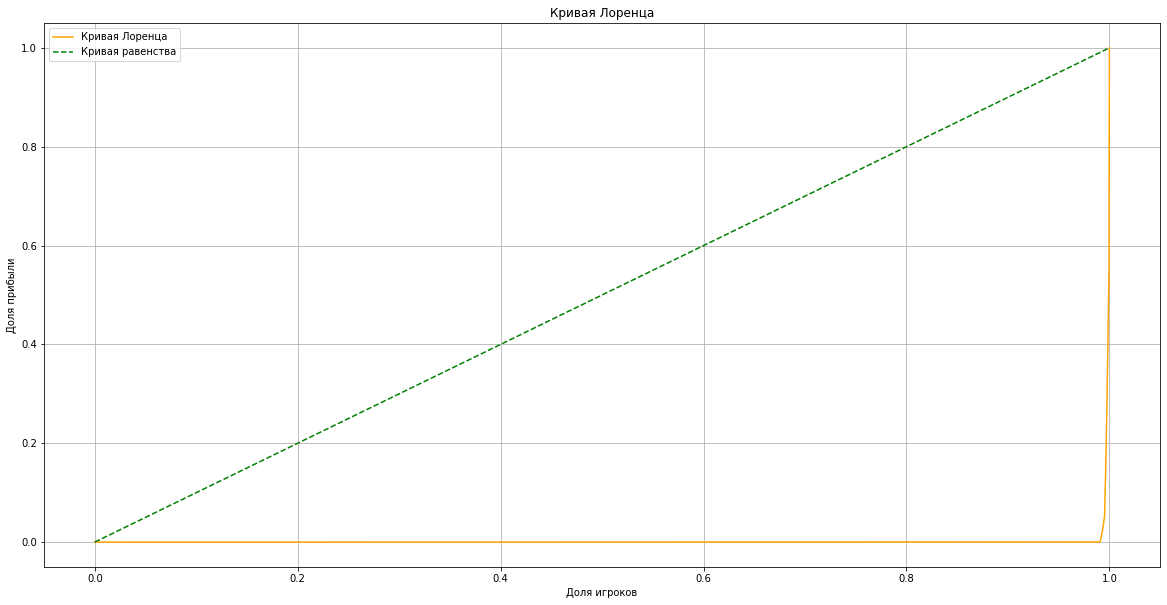

<Figure size 1440x864 with 0 Axes>

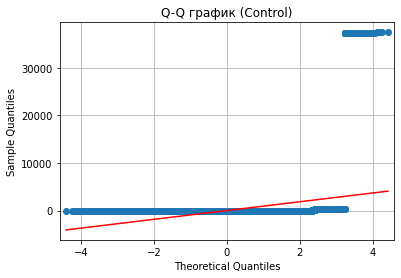

<Figure size 1440x864 with 0 Axes>

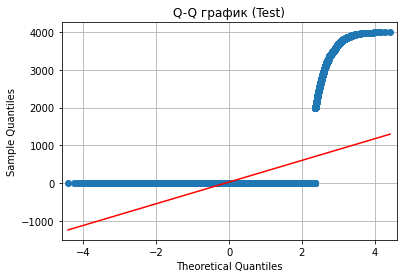

In [51]:
lorenz(df_task_2, "gamers") # кривая Лоренца
qq(control, "Control") # Q-Q для групп
qq(test, "Test")

Исходя из графика кривой Лоренца, можно сказать, что наблюдается сильное неравенство в прибыли от игроков из разных групп. Большую часть выручки создает малое количество пользователей.

В контрольной группе видны сильные сильные отклонения от нормальной линии особенно на концах.  Часть графика в правом верхнем угу говорит о наличии очень высоких значений, в то время как часть графика в левом нижнем углу говорит есть также много нулевых значений. Это говрит о том, что распределение нельзя назвать нормальным. Можно отметить, что распределние в центре не совпадает линией равенства, что также говорит о ненормальности распределения. В тестовой группе тажкже точки не совпадают  с линией равенства, что говорит о ненормальности распределения.

Проведем статистические тесты

In [52]:
from statsmodels.stats.proportion import proportions_ztest

In [53]:
successes = np.array([metrics_test['buyers'], metrics_control['buyers']]) # проведем Z-тест для конверсии
nobs = np.array([metrics_test['gamers'], metrics_control['gamers']])
z_stat, p_conv = proportions_ztest(successes, nobs)
print(f"CR: z-stat={z_stat:.4f}, p-conv={p_conv:.4f}")

CR: z-stat=-2.1080, p-conv=0.0350


Значение p-value = 0.035 < 0.05 — значит, разница статистически значима на уровне 5%. Отрицательное значение z-статистики означает, что конверсия в тестовой группе ниже, чем в контрольной. Несмотря на то, что ARPU и ARPPU выше в тесте, снижение CR может говорить о том, что меньше пользователей стали платить, пусть и с большими чеками. Тестовая группа показывает рост выручки в ARPU, ARPPU, но теряет часть платящих CR. Однако, это может быть применимо, если цель — максимизировать доход, а не количество покупателей.

Сделаем статистический t-test для сравнения средних двух выборок. 

H0 : нет статистически значимого различия в средних значениях между сравниваемыми группами
H1 : существует статистически значимое различие в средних значениях между группами

In [54]:
# T-test по ARPU, тест статистической значимости ARPU
t_stat, p_arpu = stats.ttest_ind(test['revenue'], control['revenue'], equal_var=False)
print(f"ARPU: t-stat={t_stat:.4f}, p-value={p_arpu:.4f}")

ARPU: t-stat=0.6235, p-value=0.5330


На основании проведённого статистического анализа ARPU (Average Revenue Per User) с t-статистикой 0.6235 и p-value 0.5330 можно сделать следующий вывод: полученные результаты не показывают статистически значимых различий в среднем доходе на пользователя между сравниваемыми группами. Поскольку p-value значительно превышает общепринятый порог значимости 0.05, мы не можем отвергнуть нулевую гипотезу об отсутствии различий. Это означает, что наблюдаемые расхождения в значениях ARPU, скорее всего, обусловлены случайными колебаниями данных, а не реальным влиянием исследуемых факторов. 

In [55]:
## T-test по ARPU, тест статистической значимости ARPU
t_stat, p_value_arppu = stats.ttest_ind(test['revenue'] > 0, control['revenue'] > 0, equal_var=False)
print(f"ARPPU: t-stat={t_stat:.4f}, p-value={p_value_arppu:.4f}")

ARPPU: t-stat=-2.1079, p-value=0.0350


Результаты статистического теста для ARPPU (Average Revenue Per Paying User) показывают статистически значимые различия между сравниваемыми группами. При t-статистике -2.1079 и p-value 0.0350, которое ниже стандартного порога значимости 0.05, мы можем отвергнуть нулевую гипотезу об отсутствии различий. Отрицательное значение t-статистики указывает на то, что средний доход с платящего пользователя в одной группе достоверно ниже, чем в другой. Таким образом, можно заключить, что исследуемый фактор оказал значимое влияние на ARPPU. ARPPU в тестовой группе выше, чем в контрольной

In [56]:
from scipy.stats import mannwhitneyu
u_stat, p_mw = mannwhitneyu(test['revenue'], control['revenue'], alternative='two-sided') # тест Манна-Уитни по выручке
print(f"Mann–Whitney U test:\n  U-statistic = {u_stat:.2f}\n  p-value = {p_mw:.5f}")

Mann–Whitney U test:
  U-statistic = 20468349325.00
  p-value = 0.06270


p-value = 0.0627 > 0.05, что означает, что различия в распределении выручки между группами не являются статистически значимыми на уровне 5%. Несмотря на то, что ARPU и ARPPU в тестовой группе выше, общее распределение выручки не отличается достаточно существенно, чтобы говорить о существенной разнице. В рассматриваемом тесте ARPU в тестовой группе выше на 5% по условию, однако при проверке статистической значимости разница оказывается несущественной, что означает, что наблюдаемое повышение может быть случайным. Результаты статистического теста для ARPPU (Average Revenue Per Paying User) показывают статистически значимые различия между сравниваемыми группами. При t-статистике -2.1079 и p-value 0.0350, которое ниже стандартного порога значимости 0.05, мы можем отвергнуть нулевую гипотезу об отсутствии различий. Отрицательное значение t-статистики указывает на то, что средний доход с платящего пользователя в одной группе достоверно ниже, чем в другой. Таким образом, можно заключить, что исследуемый фактор оказал значимое влияние на ARPPU. ARPPU в тестовой группе выше, чем в контрольной. Хотя в тестовой группе меньше платящих пользователей, каждый из них приносит значительно больше денег.

На основе результатов A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений, можно сделать обоснованный вывод о том, какой из них является более эффективным. В контрольной группе было 202103 игрока, из которых 1928 оказались платящими (CR 0.95%), в то время как в тестовой группе было 202667 игроков и 1805 платящих (CR  0.89%). Несмотря на то что ARPU в тестовой группе оказался на 5% выше (26.75 / 25.41 в контрольной), статистическая значимость этой разницы отсутствует, следовательно, нельзя утверждать, что она возникла неслучайно. ARPPU в тестовой группе (3003.66) значительно выше, чем в контрольной (2663.99), и эта разница статистически незначима тоже. При этом общая конверсия (CR) в тестовой группе статистически ниже (p-value = 0.0350), а значит, меньшее число пользователей совершают покупки.Распределение дохода крайне неравномерное, о чём свидетельствует медианное значение прибыли, равное нулю, и визуально выраженная концентрация на гистограмме — большинство пользователей не платят вовсе, а существенная доля дохода генерируется небольшой частью игроков.

Для принятия решения важно учитывать не одну метрику, а их совокупность. Конверсия (CR) отражает охват платящей аудитории, ARPU — общую выручку на пользователя, а ARPPU — глубину монетизации платящих игроков. Также критично учитывать характер распределения прибыли, поскольку в таких случаях средние значения могут быть искажены экстремальными значениями. Выбор лучшего предложения зависит от бизнес-целей: если важнее максимизировать охват и число платящих — контрольная группа предпочтительнее; если же приоритет — выручка от небольшого числа крупных игроков, то тестовая группа выгоднее. Оптимальным может стать комбинированный подход: использовать стратегию тестовой группы, доработав её CR, но предпочтителен в первую очередь набор тестовой выборки.

Задание 3

В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

 

In [60]:
df = df.rename(columns={'uid': 'user_id'})
df_task_2 = pd.read_csv('Проект_1_Задание_2.csv', sep =';')
df_task_3 = df_task_2.merge(df, on = 'user_id', how = 'inner') # создадим новый датасет путем объединения датасетов из первых двух заданий
#df_task_3['reg_ts'] = pd.to_datetime(df_task_3['reg_ts'], unit='s') # преобразуем данные с датами в нужный формат timestamp 
#df_task_3['auth_ts'] = pd.to_datetime(df_task_3['auth_ts'], unit='s')
df_task_3.head()

,user_id,revenue,testgroup,reg_ts,auth_ts
0,1,0,b,1998-11-18,1998-11-18
1,2,0,a,1999-07-22,1999-07-22
2,2,0,a,1999-07-22,1999-07-25
3,2,0,a,1999-07-22,1999-07-31
4,2,0,a,1999-07-22,1999-08-05


Для оценки результата прошедшего события можно рассчитать метрики, показывающие вовлечённость игроков, эффективность события с точки зрения удержания и монетизации, а также влияние на поведение в игре до, во время и после события. Одним из главных метрик может быть доля пользователей, принявших участие в событии среди всех активных игроков — позволяет судить о его привлекательности и уровне охвата. Важным оказателем также процент игроков, завершивших всё событие до конца, что даёт представление о его сложности и интересе со стороны аудитории. Среднее количество пройденных этапов или уровней помогает выявить, на каком этапе происходит наибольший отток и где потенциально возникают трудности.

Для анализа удержания пользователей стоит отслеживать динамику возвращения игроков на 1-й, 7-й (14-й и 21-й) день с начала события — эти показатели позволяют судить о краткосрочной вовлечённости и удержании интереса.  Необходимо также рассмотреть такие метрики, как средний доход на пользователя (ARPU), доход на одного платящего игрока (ARPPU), а также изменение общей выручки за период активности события. Особое внимание следует уделить доле новых платящих игроков, которые совершили первую покупку благодаря участию в событии — это говорит о его влиянии на увеличение числа платящих игроков.Также, можно посчитать сколько игроки тратили в период тематического события непосредственно на продвижение в игре (покупка атрибутов и прочее).

Также можно рассмотреть количество игровых сессий и их среднюю продолжительность, чтобы оценить общий уровень активности и вовлечения. Важен также показатель доли пользователей, прекративших играть сразу после окончания события — он может свидетельствовать о перенасыщении аудитории или недостаточной ценности события для дальнейшего удержания.

Посчитаем общие метрики

In [61]:
total_users = df_task_3['user_id'].nunique() # количество активных пользователей
total_users

364555

In [62]:
df_task_3["days_since_reg"] = (df_task_3["auth_ts"] - df_task_3["reg_ts"]).dt.days # сколько прошло времени с момента регистрации до авторизацией
user_revenue = df_task_3.groupby("user_id").agg({"reg_ts": "min","revenue": "sum"}).reset_index() # найдем дату регистрации и суммарный доход от каждого игрока 
df_auth = df_task_3[["user_id", "auth_ts"]].drop_duplicates() 

def ltv(days): # строим функцию для рассчета LTV 
    df_for_ltv = df_task_3.copy()
    df_for_ltv["cutoff_ts"] = df_for_ltv["reg_ts"] + pd.to_timedelta(days, unit="d")
    df_for_ltv = df_for_ltv[df_for_ltv["auth_ts"] <= df_for_ltv["cutoff_ts"]]
    ltv = df_for_ltv.groupby("user_id")["revenue"].sum().mean()
    return round(ltv, 2)

ltv_1 = ltv(1) # 1 день
ltv_7 = ltv(7) # 7 день
ltv_14 = ltv(14) # 14 день
ltv_21 = ltv(21) # 21 день

In [63]:
print(ltv_1)
print(ltv_7)
print(ltv_14)
print(ltv_21)

26.9
35.38
43.9
51.33


In [69]:
df_task_3["reg_ts"] = pd.to_datetime(df_task_3["reg_ts"])
df_task_3["week_reg"] = df_task_3["reg_ts"].dt.to_period("W").astype(str)# найдем долю платящих игроков по когортам 
df_task_3["buyer_3"] = df_task_3["revenue"] > 0
cohort_pay = df_task_3.groupby("week_reg").agg(total_users=("user_id", "nunique"),payers=("buyer_3", "sum")).assign(conversion=lambda x: (x["payers"] / x["total_users"]).round(4))
cohort_pay

,total_users,payers,conversion
week_reg,,,
1998-11-16/1998-11-22,1,0,0.0000
1999-07-19/1999-07-25,1,0,0.0000
2000-01-10/2000-01-16,1,0,0.0000
2000-05-22/2000-05-28,1,0,0.0000
2000-09-11/2000-09-17,1,0,0.0000
...,...,...,...
2018-12-17/2018-12-23,3998,527,0.1318
2018-12-24/2018-12-30,4044,215,0.0532
2018-12-31/2019-01-06,4091,372,0.0909


In [78]:
df_task_3["auth_ts"] = pd.to_datetime(df_task_3["auth_ts"])
df_task_3["day"] = df_task_3["auth_ts"].dt.date # DAU число активных пользователей по дням 
dau = df_task_3.groupby("day")["user_id"].nunique()

df_task_3["week"] = df_task_3["auth_ts"].dt.to_period("W").astype(str) # WAU
wau = df_task_3.groupby("week")["user_id"].nunique()

df_task_3["month"] = df_task_3["auth_ts"].dt.to_period("M").astype(str) # MAU
mau = df_task_3.groupby("month")["user_id"].nunique()

In [79]:
print(dau)
print(wau)
print(mau)

day
1998-11-18       1
1999-07-22       1
1999-07-25       1
1999-07-31       1
1999-08-05       1
              ... 
2020-09-19    4594
2020-09-20    4678
2020-09-21    4653
2020-09-22    4541
2020-09-23    2680
Name: user_id, Length: 6169, dtype: int64
week
1998-11-16/1998-11-22        1
1999-07-19/1999-07-25        1
1999-07-26/1999-08-01        1
1999-08-02/1999-08-08        1
1999-08-09/1999-08-15        1
                         ...  
2020-08-24/2020-08-30    18278
2020-08-31/2020-09-06    18278
2020-09-07/2020-09-13    18278
2020-09-14/2020-09-20    18278
2020-09-21/2020-09-27    10917
Name: user_id, Length: 1107, dtype: int64
month
1998-11        1
1999-07        1
1999-08        1
1999-09        1
1999-10        1
           ...  
2020-05    18278
2020-06    18278
2020-07    18278
2020-08    18278
2020-09    18278
Name: user_id, Length: 256, dtype: int64


In [80]:
loyalty = (dau.mean() / mau.mean()).round(4) # выведем насколько лояльны пользователи 
loyalty

0.2293

In [81]:
auth_counts = df_task_3.groupby('user_id').size() # cuруппируем по user_id и считаем количество авторизаций
average_auth_per_user = auth_counts.mean() # найдем среднее количество авторизаций на пользователя
print(f"Среднее количество авторизаций на пользователя: {average_auth_per_user:.2f}")

Среднее количество авторизаций на пользователя: 17.28


In [82]:
df_task_3["cohort"] = df_task_3["reg_ts"].dt.to_period("W").astype(str) # проведем когортный анализ, доход по дням от даты регистрации
df_task_3["days_after_reg"] = (df_task_3["auth_ts"] - df_task_3["reg_ts"]).dt.days
cohort_ltv = df_task_3.groupby(["cohort", "days_after_reg"])["revenue"].mean().fillna(0).unstack().fillna(0).cumsum(axis=1)
cohort_ltv

days_after_reg,0,1,2,3,4,5,6,7,8,9,...,7701,7704,7706,7709,7712,7716,7720,7721,7727,7729
cohort,,,,,,,,,,,,,,,,,,,,,
1998-11-16/1998-11-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1999-07-19/1999-07-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-10/2000-01-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-05-22/2000-05-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-09-11/2000-09-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-17/2018-12-23,14.913957,14.913957,35.253243,36.916226,64.588953,67.053239,69.887149,69.887149,86.247555,118.247555,...,2745.583534,2745.583534,2745.583534,2745.583534,2745.583534,2745.583534,2745.583534,2745.583534,2745.583534,2745.583534
2018-12-24/2018-12-30,18.834817,18.834817,18.834817,34.337408,34.337408,58.446279,60.756242,62.021802,75.736778,88.533569,...,8096.616251,8096.616251,8096.616251,8096.616251,8096.616251,8096.616251,8096.616251,8096.616251,8096.616251,8096.616251
2018-12-31/2019-01-06,24.897091,24.897091,26.897091,30.046576,59.606962,75.312845,77.179042,78.350470,78.350470,78.350470,...,11563.225746,11563.225746,11563.225746,11563.225746,11563.225746,11563.225746,11563.225746,11563.225746,11563.225746,11563.225746


Общее количество уникальных пользователей составило 364 555 человек, при этом среднее количество авторизаций на одного пользователя равняется 17,28, что свидетельствует о достаточно высокой вовлеченности аудитории. Уровень лояльности, измеряемый соотношением DAU к MAU, находится на отметке 0,2293, что является типичным показателем для игровой индустрии, но оставляет пространство для улучшения. Монетизация продукта демонстрирует положительную динамику: средний доход на пользователя (LTV) последовательно растет с 26,9 денежных единиц в первый день до 51,33 к 21 дню использования. Конверсия в платящих пользователей варьируется от 5% до 21% в зависимости от когорты, со средним значением около 13%. Особого внимания заслуживает когорта января 2019 года, где LTV превысил 300 денежных единиц уже к 10-му дню, что указывает на наличие успешных стратегий монетизации, которые стоит изучить подробнее. Когортный анализ выявил значительную вариативность показателей между разными периодами. Некоторые когорты демонстрируют аномально долгий жизненный цикл пользователей (до 7700+ дней), что требует дополнительной проверки данных на предмет возможных ошибок или особенностей учета. При этом часть когорт показывает нулевые значения по ключевым метрикам, что может быть связано либо с проблемами в данных, либо с особенностями этих временных периодов. Основные рекомендации : необходимо провести анализ наиболее успешных когорт для выявления факторов успеха, проведение аудита данных для когорт с аномальными показателями, оптимизацию стратегии монетизации на основе поведения пользователей с высоким LTV, а также работу над улучшением показателей удержания пользователей. Текущий уровень лояльности имеет потенциал для роста. 

Приурочим к тематическому событию

In [83]:
# предположим что тематическое событие длится неделю
df_task_3["auth_ts"] = pd.to_datetime(df_task_3["auth_ts"])
df_task_3['auth_week'] = df_task_3['auth_ts'].dt.to_period('W').apply(lambda r: r.start_time) # создадим столбец с отображением недель в данных по авторизации
weekly_auth_counts = df_task_3.groupby('auth_week').size().reset_index(name='auth_count') # выведем количество авторизаций 
max_week = weekly_auth_counts.loc[weekly_auth_counts['auth_count'].idxmax(), 'auth_week'] # Находим неделю с максимумом авторизаций
start_of_week = max_week # обозначим начало и конец этой недели
end_of_week = max_week + pd.Timedelta(days=6)
print(f"Неделя с наибольшим числом авторизаций: с {start_of_week.date()} по {end_of_week.date()}") # в эту неделю скорее всего было тематическое событие

Неделя с наибольшим числом авторизаций: с 2019-01-07 по 2019-01-13


In [84]:
event_start = pd.to_datetime("2020-09-14") # отобразим период события
event_end = pd.to_datetime("2020-09-20")

In [85]:
event_df = df_task_3[(df_task_3['auth_ts'] >= event_start) & (df_task_3['auth_ts'] <= event_end)] # отсортируем активных игроков в событие

In [86]:
event_users = event_df['user_id'].nunique() # выведем количество игроков

In [87]:
event_revenue = event_df['revenue'].sum() # посчитаем выручку за период тематического события

In [88]:
df_task_3["buyer_3"] = df_task_3["revenue"] > 0
first_pays = df_task_3[df_task_3['buyer_3']].sort_values(by='auth_ts').drop_duplicates('user_id') # найдем новых платящих игроков
new_payers = first_pays[(first_pays['auth_ts'] >= event_start) & (first_pays['auth_ts'] <= event_end)]

In [89]:
df_task_3['days_since_reg'] = (df_task_3['auth_ts'] - df_task_3['reg_ts']).dt.days # посчитаем ретеншн
ret_1 = df_task_3[(df_task_3['days_since_reg'] == 1) & (df_task_3['auth_ts'] >= event_start) & (df_task_3['auth_ts'] <= event_end)]['user_id'].nunique()
ret_7 = df_task_3[(df_task_3['days_since_reg'] == 7) & (df_task_3['auth_ts'] >= event_start) & (df_task_3['auth_ts'] <= event_end)]['user_id'].nunique()
ret_20 = df_task_3[(df_task_3['days_since_reg'] == 20) & (df_task_3['auth_ts'] >= event_start) & (df_task_3['auth_ts'] <= event_end)]['user_id'].nunique()

In [90]:
event_week_df = df_task_3[(df_task_3['auth_ts'] >= event_start) & (df_task_3['auth_ts'] <= event_end)] # оставим авторизации за период события
auth_counts = event_week_df.groupby('user_id').size() # cгруппируем по user_id и считаем количество авторизаций
average_auth_per_user = auth_counts.mean() # найдем среднее количество авторизаций на пользователя

In [91]:
print(f"Период: с {event_start.date()} по {event_end.date()}")
print(f"Активных игроков во время события: {event_users}")
print(f"Доход во время события: {event_revenue:.2f}")
print(f"Новые платящие игроки: {new_payers['user_id'].nunique()}")
print(f"Ретеншн на 1 день: {ret_1:.4f}, на 7 день: {ret_7:.4f}, на 20 день: {ret_20:.4f}")
print(f"Среднее число авторизаций на пользователя: {average_auth_per_user:.2f}")

Период: с 2020-09-14 по 2020-09-20
Активных игроков во время события: 18278
Доход во время события: 839906.00
Новые платящие игроки: 0
Ретеншн на 1 день: 0.0000, на 7 день: 0.0000, на 20 день: 0.0000
Среднее число авторизаций на пользователя: 1.76


При 18278 активных игроках во время события общая выручка составила 839906.00 денежных единиц. Наблюдается проблема в  отсутствии новых платящих пользователей – весь доход генерируется исключительно старой аудиторией, что создает серьезные риски для устойчивости бизнес-модели. Также, отмечаются очень низкие показатели удержания. Такие значения говорят о серьезных проблемах в онбординге и первом впечатлении об игре. Это подтверждается и крайне низкой активностью – среднее число авторизаций на пользователя равно 1.76, что означает: большинство игроков заходят в игру лишь один раз и больше не возвращаются.

Для оценки результатов тематичсекого события необходимо анализировать метрики монетизации, такие как изменение ARPU и ARPPU, retention, revenue до, во время и после тематичеcкого события. Проанлизировать динамику показателей MAU/DAU, изменения числа участников в событиях, изменения колиства платящих игроков.

Если в новом событии была изменена механика, и теперь при каждой неудачной попытке прохождения уровня игрок откатывается назад, то необходимо дополнительно учитывать набор анализируемых метрик, чтобы оценить влияние изменений на игровой опыт и экономику проекта. Такие изменения повышают риск оттока и могут по-разному сказаться на различных группах игроков. В этой ситуации становится важным анализировать долю пользователей, покинувших событие на каждом уровне — это позволит выявить конкретные точки оттока. Количество повторных попыток прохождения одного и того же уровня отражает мотивацию и терпение игроков. Следует учитывать косвенные признаки раздражения, такие как снижение времени в игре, рост жалоб в поддержку или резкое падение активности. Сравнение удержания участвующих в событии игроков с общей базой поможет выявить долгосрочное влияние нового механизма. Также стоит анализировать, насколько усложнение влияет на скорость завершения события и увеличивает ли оно покупки атрибутов. Таким образом, при изменении механики и важно дополнять базовые метрики анализа дополнительными показателями, которые отслеживают поведение, точки отказа и эмоциональную реакцию игроков, чтобы вовремя скорректировать баланс. 

Необходимо рассмотреть метрики вовлеченности, монетизации и поведенческие изменения. Основной метрикой становится среднее число откатов на игрока, которое рассчитывается как общее количество откатов всех игроков, поделенное на число уникальных участников. Для оценки реального прогресса игроков использовать метрику прогресса, где количество пройденных уровней делится на (число откатов + 1), что позволяет учесть потери прогресса. Особенно важно отслеживать потерю игроков из-за откатов - количество пользователей, бросивших прохождение после хотя бы одного отката, а также скорость восстановления (процент игроков, сумевших вернуться к исходному прогрессу после отката). Также, можно ввести метрику, включающую среднее количество попыток на уровень (которое вероятно вырастет) и частоту повторных неудач на одном уровне. Важным является показатель оттока из события - доля игроков, покинувших прохождение после откатов, а также время завершения события, которое может существенно увеличиться.

Изменения в механике могут привести к нескольким сценариям: снижению количества завершивших событие (падение Completion Rate), уменьшению удержания (Retention), если игроки посчитают механику несправедливой, но при этом возможен рост монетизации за счет покупок, помогающих избежать откатов. Для комплексной оценки необходимо сравнивать поведение участвующих в событии игроков с контрольной группой, анализировать динамику изменений ARPPU, а также отслеживать отзывы через системы обратной связи. Особое внимание стоит уделить точкам максимального оттока - уровням, где чаще всего происходят откаты и последующие уходы игроков. Регулярный мониторинг этих показателей поможет сохранить интерес игроков при сохранении экономической эффективности.

Вывод

В результате выполнения проекта был проведен первичный анализ и обработка данных (трех предложенных датасетов). В результате выполнения первого задания можно отметить: наибольший ретеншн игроков отмечается в первый день регистрации (100%), что вполне объяснимо, так как сразу после регистрации обычно пользователи входят в игру. Однако, на следующий день ситуация меняется и retention падает до 2%, что указывает на значительный отток, что говорит о необходимости сосредоточиться на улучшении онбординга и первого пользовательского опыта (скорее всего возникают какие-то проблемы). Уже на второй неделе показатель ретеншн варьируется от 4,6% до 5,2%. Наибольший показатель ретеншн, за исключением 1 дня, наблюдается на 6 день (6,9%), 5 день (6,1) что может быть связано с проведением каких-то тематических событий или предоставением скидки, например. После 11 дня показатель колеблется в среднем от 3 до 5%. Стоит обратить внимание на качество игры и уровни игры, которые игроки проходят в дни с малым ретеншн для выявления причин. Так, наблюдается сильный отток после первого дня, значит, нужно обратить внимание на совершенствование первого опыта пользователя. Необходимо выявить с чем связано повышение возврата в определенные дни, посмотреть какие события происходят в это время и в дальнейшем, возможно распространить на постоянной основе. 

Для выявления какое из акционных предложений лучше были рассмотрены такие метрики, как ARPU, ARPP, revenue, CR, построена кривая Лоренца и проведены статистические тесты. Конверсия в тестовой группе ниже, чем в контрольной, платящих игроков также в тестовой группе меньше, однако показатели ARPU, ARPPU и общая выручка выше в тестовой группе, что говорит о том, что большая часть выручки в тесте обеспечена меньшим числом платящих игроков, но с большими чеками. В контрольной группе вся выручка приходится на игроков с покупками >1000 ₽. Тестовое предложение расширило сегмент платящих – появились игроки с чеком 100–500 ₽. Контрольная группа эффективнее в привлечении крупных трат. В распределении прибыли от игроков видно, что большинство из них играют бесплатно, а почти весь доход приносит небольшая доля игроков. В разрезе групп выявилось, что в контрольной группе больше игроков с высокой оплатой, а в тестовой группе больше игроков, но они с маленькой оплатой. В тестовой группе средний доход с платящего пользователя значительно выше, что говорит о том, что платящие игроки при новом предложении приносят больше денег, возможно, из-за наличия более привлекательных или дорогих товаров. За весь период показатель retention rate у контрольной группы выше, чем у тестовой. Игроки из контрольно группы чаще возвращаются в игру. Сделан вывод, что в связи с целью бизнеса, скорее всего получить большую прибыль, лучшим является акционный набор для тестовой группы. 

Исходя из графика кривой Лоренца и QQ можно сказать, что наблюдается сильное неравенство в прибыли от игроков из разных групп. Проведен тест Шапиро-Уилка, который подтвердил ненормальность распределния данных. Проведен T-test для показателей ARPU, ARPPU, Манна-Уитни для revenue. Выявлено: несмотря на то что ARPU в тестовой группе оказался на 5% выше (26.75 / 25.41 в контрольной), статистическая значимость этой разницы отсутствует, следовательно, нельзя утверждать, что она возникла неслучайно. ARPPU в тестовой группе (3003.66) значительно выше, чем в контрольной (2663.99), эта разница статистически значима. Cредний доход с платящего пользователя в одной группе достоверно ниже, чем в другой. ARPPU в тестовой группе выше, чем в контрольной. Хотя в тестовой группе меньше платящих пользователей, каждый из них приносит значительно больше денег. Таким образом, можно заключить, что исследуемый фактор оказал значимое влияние на ARPPU.  При этом общая конверсия (CR) в тестовой группе статистически ниже (p-value = 0.0350), а значит, меньшее число пользователей совершают покупки.Распределение дохода крайне неравномерное, о чём свидетельствует медианное значение прибыли, равное нулю, и визуально выраженная концентрация на гистограмме — большинство пользователей не платят вовсе, а существенная доля дохода генерируется небольшой частью игроков.

Сделан вывод, что для принятия решения о наибольшей эффективности акционных наборов важно учитывать не одну метрику, а их совокупность. Также критично учитывать характер распределения прибыли, поскольку в таких случаях средние значения могут быть искажены экстремальными значениями. Выбор лучшего предложения зависит от бизнес-целей: если важнее максимизировать охват и число платящих — контрольная группа предпочтительнее; если же приоритет — выручка от небольшого числа крупных игроков, то тестовая группа выгоднее. Оптимальным может стать комбинированный подход: использовать стратегию тестовой группы, доработав её CR, но предпочтителен в первую очередь набор тестовой выборки.

Для оценки результата тематических событий можно рассчитать метрики, показывающие вовлечённость игроков, эффективность события с точки зрения удержания и монетизации, а также влияние на поведение в игре до, во время и после события. Одним из ключевых показателей выступает доля пользователей, принявших участие в событии среди всех активных игроков — этот параметр позволяет судить о его привлекательности и уровне охвата. Важным индикатором является также процент игроков, завершивших всё событие до конца, что даёт представление о его сбалансированной сложности и интересе со стороны аудитории. Среднее количество пройденных этапов или уровней помогает выявить, на каком этапе происходит наибольший отток и где потенциально возникают трудности. Для анализа удержания пользователей стоит отслеживать динамику возвращения игроков на 1-й, 7-й (14-й и 21-й) день с начала события — эти показатели позволяют судить о краткосрочной вовлечённости и удержании интереса. В части монетизации необходимо учитывать такие метрики, как средний доход на пользователя (ARPU), доход на одного платящего игрока (ARPPU), а также изменение общей выручки за период активности события. Особое внимание следует уделить доле новых платящих игроков, которые совершили первую покупку благодаря участию в событии — это демонстрирует его влияние на расширение платящей базы.Также, можно посчитать сколько игроки тратили в период тематического события непосредственно на продвижение в игре (покупка атрибутов и прочее). Дополнительно полезно отслеживать количество игровых сессий и их среднюю продолжительность, чтобы оценить общий уровень активности и вовлечения. Важен также показатель доли пользователей, прекративших играть сразу после окончания события — он может свидетельствовать о перенасыщении аудитории или недостаточной ценности события для дальнейшего удержания.

Касательно изменений в метриках при усложнении механики: такие изменения повышают риск оттока и могут по-разному сказаться на различных группах игроков. В этой ситуации становится важным анализировать долю пользователей, покинувших событие на каждом уровне — это позволит выявить конкретные точки оттока. Количество повторных попыток прохождения одного и того же уровня отражает мотивацию и терпение игроков. Следует учитывать косвенные признаки раздражения, такие как снижение времени в игре, рост жалоб в поддержку или резкое падение активности. Сравнение удержания участвующих в событии игроков с общей базой поможет выявить долгосрочное влияние нового механизма. Также стоит анализировать, насколько усложнение влияет на скорость завершения события и увеличивает ли оно покупки атрибутов. Таким образом, при изменении механики и важно дополнять базовые метрики анализа дополнительными показателями, которые отслеживают поведение, точки отказа и эмоциональную реакцию игроков, чтобы вовремя скорректировать баланс.

Очень низкие показатели ретеншн, что может быть связано со слишком сложным или неинтересным стартовом опыте,  отсутствием четкой мотивации для возвращения в игру, возможными проблемами с балансом или прогрессией, неадекватной системой монетизации для новых пользователей, возможно, стоит ввести скидки.Несмотря на положительную динамику роста LTV, текущие показатели активности и проблемы с данными требуют немедленного реагирования.

Для улучшения показателей необходимо срочно пересмотерть систему онбординга, упростив первые уровни и добавив интерактивное обучение, улучшить качество игры, внедрить механизмы стимулирования возврата (ежедневные награды, персонализированные push-уведомления) и анализа поведения игроков, проанализировать и возможно пересмотреть стартовые платные предложения, провести A/B тестирование различных версий начального опыта. Также, стоит провести внедрение системы ежедневных бонусов с нарастающим вознаграждением, создать персонализированные push-уведомления с учетом поведения пользователя, разработать персонализированные офферы для разных сегментов.

Проект имеет потенциал, но в первую очередь требует улучшения первых впечатлений и перебалансировки монетизации для привлечения новых платящих игроков.